In [125]:
import numpy as np
import re
import math
import random
import matplotlib.pyplot as plt

In [126]:
yelp_input = []
l = []
yelp_path = './yelp_labelled.txt'
with open(yelp_path) as yp:
    line = yp.readline()
    while line:
        yelp_input.append(line.strip())
        line = yp.readline()

In [127]:
def DataSet(ds):
    data = [j[:-3] for j in ds]
    data = [item.lower() for item in data]
    for i in range(len(data)):
        data[i] = re.sub('[^A-Za-z0-9-\s]+', '', data[i])
    k = [j[-1:] for j in ds]
    for i in range(0, len(k)): 
        k[i] = int(k[i])
    ds = list(zip(data , k))
    
    return ds

In [128]:
ds = DataSet(yelp_input)

In [129]:
def dist(ds):
    ds_1 = []
    ds_0 = []
    
    for i in range(len(ds)):
        if ds[i][1] == 1:
            ds_1.append(ds[i])
        else:
            ds_0.append(ds[i])
    
    ds_1 = random.sample(ds_1, len(ds_1))
    
    ds_0 = random.sample(ds_0, len(ds_0))
    
    return ds_1, ds_0

In [130]:
ds_1, ds_0 = dist(ds)

In [131]:
def train_test_split(ds, val):
    index = int(val*len(ds))
    train = ds[:index]
    test = ds[index:]
    
    return train, test

In [132]:
train1, test1 = train_test_split(ds_1, 0.7)
train0, test0 = train_test_split(ds_0, 0.7)

In [133]:
def token_data(input_data):
    words = {}
    tot_words = 0
    for i in range(len(input_data)):
        for w in input_data[i][0].split(" "):
            tot_words += 1
            if(w in words):
                words[w] += 1
            else:
                words[w] = 1
    
    return words, tot_words

In [134]:
word_1, tot_word1 = token_data(train1)
word_0, tot_word0 = token_data(train0)

In [135]:
train = train1 + train0
train_random = random.sample(train, len(train))

test = test1 + test0
test_random = random.sample(test, len(test))

In [136]:
TrainData = []
TrainLabels = []
TestData = []
TestLabels = []


for i in range(len(train_random)):
    TrainData.append(train_random[i][0])
    TrainLabels.append(train_random[i][1])
    

for i in range(len(test_random)):
    TestData.append(test_random[i][0])
    TestLabels.append(test_random[i][1])

Creating Dictionary

In [137]:
def dictionary(input_data):
    voc = {}
    tot_words = 0
    for i in range(len(input_data)):
        for w in input_data[i][0].split(" "):
            tot_words += 1
            if(w in voc):
                voc[w] += 1
            else:
                voc[w] = 1
    
    return voc, tot_words

In [138]:
voc, tot_words = dictionary(train)

In [176]:
print("Dictionary:\n ", voc)

Dictionary:
  {'food': 86, 'arrived': 3, 'quickly': 3, 'when': 14, 'i': 223, 'received': 3, 'my': 55, 'pita': 3, 'it': 89, 'was': 191, 'huge': 3, 'did': 13, 'have': 45, 'a': 160, 'lot': 5, 'of': 83, 'meat': 7, 'in': 79, 'so': 54, 'thumbs': 2, 'up': 17, 'there': 26, 'our': 29, 'server': 10, 'very': 55, 'nice': 13, 'and': 269, 'attentive': 2, 'as': 23, 'were': 46, 'the': 396, 'other': 10, 'serving': 2, 'staff': 12, 'great': 52, 'subway': 3, 'fact': 4, 'its': 13, 'good': 69, 'you': 42, 'come': 8, 'here': 47, 'every': 6, 'will': 32, 'not': 75, 'meet': 1, 'your': 20, 'expectations': 1, 'atmosphere': 9, 'is': 121, 'fun': 2, 'delicious': 18, 'just': 23, 'spicy': 5, 'enough': 7, 'be': 55, 'sure': 5, 'to': 154, 'ask': 3, 'for': 76, 'spicier': 1, 'if': 23, 'prefer': 1, 'that': 40, 'way': 12, 'their': 23, 'chow': 1, 'mein': 1, 'service': 54, 'excellent': 5, 'prices': 6, 'are': 37, 'pretty': 16, 'reasonable': 3, 'considering': 2, 'this': 106, 'vegas': 17, 'located': 1, 'inside': 4, 'crystals': 1, 

In [177]:
print("Total Words: ", tot_words)

Total Words:  7649


In [ ]:
Prior Calculation

In [139]:
def prior_calc(trainClass, data):
    L = math.log(len(trainClass)/len(data))
    
    return L

In [140]:
L0 = prior_calc(train0, train)
L1 = prior_calc(train1, train)

Prediction

In [141]:
def predict(mL0, mL1, token0, token1, test):
    y = []
    acc = 0
    
    for i in range(len(test)):
        pred0 = mL0
        pred1 = mL1
    
        for w in test[i][0].split(" "):
            w = w.lower()
            if token0.__contains__(w):
                pred0 += token0[w]
            if token1.__contains__(w):    
                pred1 += token1[w]
    
        if pred0 > pred1:
            y.append(0)
        else: 
            y.append(1)
        
        if y[i] == test[i][1]:
            acc += 1
    
    total_acc = acc/len(test)
    
    return total_acc

mAP calculation

In [142]:
def Map(voc_data, voc_class, tot_words, k):
    Acc_tokens = {}
    voc_len = len(voc_data)
    
    for w in voc_data:
        if voc_class.__contains__(w):
            Acc_tokens[w] = math.log((voc_class[w] + k)/(tot_words + (voc_len*k)))
        else:
            if k != 0:
                Acc_tokens[w] = math.log((k)/(tot_words + (voc_len*k)))
    return Acc_tokens

In [143]:
L_token0 = Map(voc, word_0, tot_word0, 0)
L_token1 = Map(voc, word_1, tot_word1, 0)

In [144]:
Map_token0 = Map(voc, word_0, tot_word0, 1)
Map_token1 = Map(voc, word_1, tot_word1, 1)

Cross Validation

In [155]:
def cross_validation(t0,t1,a,m,k):
    
    new_train_0 = random.sample(t0,len(t0))
    new_train_1 = random.sample(t1,len(t1))
    
    fold = int(len(new_train_0)/a)
    
    MAP_accuracy = np.zeros((10, 10))
    
    MAP_sm_accuracy = []
    
    sd_L = []
    sd_map = []

    cv_test0 = []
    cv_test1 = []
    cv_train0 = []
    cv_train1 = []

    for i in range(a):
        if i == 0:
            cv_test0 = new_train_0[(i*fold):((i+1)*fold)]
            cv_train0 = new_train_0[(i+1)*fold:]

            cv_test1 = new_train_1[i*fold:(i+1)*fold]
            cv_train1 = new_train_1[(i+1)*fold:]
        if i == (a-1):
            cv_test0 = new_train_0[i*fold:(i+1)*fold]
            cv_train0 = new_train_0[:(i)*fold]

            cv_test1 = new_train_1[i*fold:(i+1)*fold]
            cv_train1 = new_train_1[:(i)*fold]
        else:
            cv_test0 = new_train_0[i*fold:(i+1)*fold]
            cv_train0 = new_train_0[:(i)*fold] + new_train_0[(i+1)*fold:]

            cv_test1 = new_train_1[i*fold:(i+1)*fold]
            cv_train1 = new_train_1[:(i)*fold] + new_train_1[(i+1)*fold:]
            
            
        
        if k == 1:
            for l in range(10):

                newTrain1 = cv_train1[:int(((l+1)*len(cv_train1)/10))]
                newTrain0 = cv_train0[:int(((l+1)*len(cv_train0)/10))]

                voc,tot_words = dictionary(newTrain1 + newTrain0)

                vocab_1,tot_word1 = dictionary(newTrain1)
                vocab_0,tot_word0 = dictionary(newTrain0)

                L0 = prior_calc(newTrain0,newTrain1+newTrain0)
                L1 = prior_calc(newTrain1,newTrain1+newTrain0)

                Map_token0 = Map(voc,vocab_0,tot_word0,m)
                Map_token1 = Map(voc,vocab_1,tot_word1,m)

                MAP_accuracy[i][l] = predict(L0,L1,Map_token0,Map_token1,cv_test1+cv_test0)
                
            
        if k == 2:
            newTrain1 = cv_train1
            newTrain0 = cv_train0

            voc,tot_words = dictionary(newTrain1 + newTrain0)

            voc_1,tot_word1 = dictionary(newTrain1)
            voc_0,tot_word0 = dictionary(newTrain0)

            L0 = prior_calc(new_train_0,new_train_1+new_train_0)
            L1 = prior_calc(new_train_1,new_train_1+new_train_0)

            Map_token0 = Map(voc,voc_0,tot_word0,m)
            Map_token1 = Map(voc,voc_1,tot_word1,m)

            MAP_sm_accuracy.append(predict(L0,L1,Map_token0,Map_token1,cv_test1+cv_test0))
    
    if k == 2:
        mean = np.mean(MAP_sm_accuracy,axis=0)
        stand = np.std(MAP_sm_accuracy,axis=0)
        return mean,stand
    
    if k ==1:
        mean = np.mean(MAP_accuracy, axis=0)
        stand = np.std(MAP_accuracy, axis=0)
        return mean,stand

In [156]:
mean_MAP,stand_MAP = cross_validation(ds_0, ds_1,10,1,1)

In [160]:
def plot_graph(mean_MAP,stand_MAP):
    
    ind = np.arange(10)

    a = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
    
    y0 = mean_MAP
    y_err0 = stand_MAP
    
    plt.figure(200)
    plt.errorbar(a,y0,y_err0, color="red")
    
    plt.title("Accuracy before smoothing")
    plt.gca().legend(('Mean Accuracy'))
    plt.xlabel('Train-set')
    plt.ylabel('Accuracy')
    plt.xticks(a)
    plt.tick_params(axis="x", labelsize=9)
    fig = plt.gcf()
    fig.set_size_inches(10,7)
    plt.show()

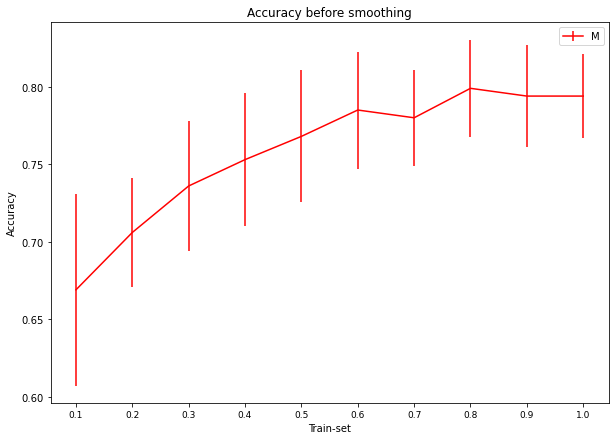

In [161]:
plot_graph(mean_MAP, stand_MAP)

In [162]:
smooth_mean = []
smooth_stand = []
for i in range(10):
    s_mean,s_stand = cross_validation(ds_0, ds_1,10,(i/10),2)
    smooth_mean.append(s_mean)
    smooth_stand.append(s_stand)
for j in range(10):
    s_mean,s_stand = cross_validation(ds_0, ds_1,10,(j+1),2)
    smooth_mean.append(s_mean)
    smooth_stand.append(s_stand)

In [173]:
def sm_plot(x,xerr):
    
    a = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]
    plt.figure(500)
    plt.errorbar(a,x,xerr, color="red")
    plt.title("Accuracy after smoothing")
    plt.legend(('m'))
    plt.xlabel('test set')
    plt.ylabel('Accuracy')
    plt.xticks(x)
    plt.tick_params(axis="x", labelsize=9)
    fig = plt.gcf()
    fig.set_size_inches(15,10)
    plt.show()

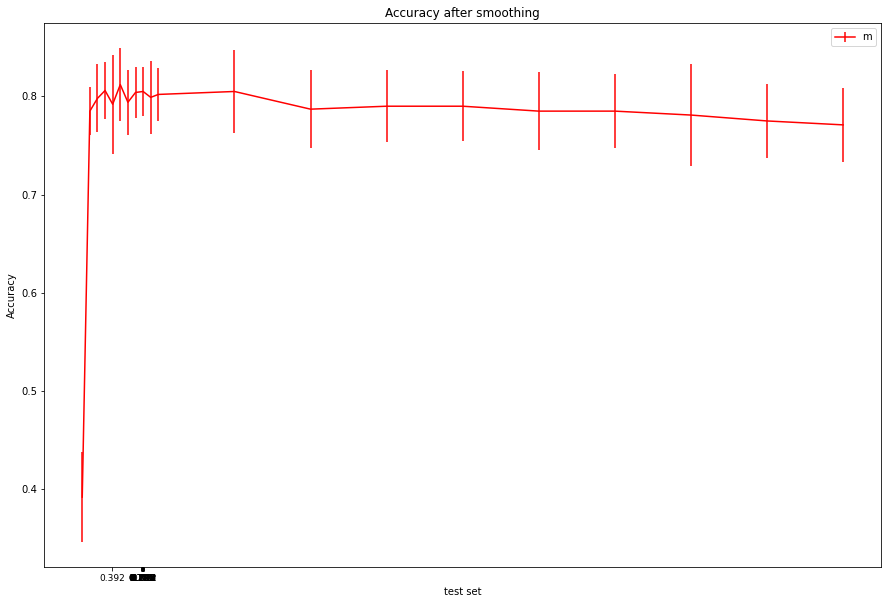

In [174]:
sm_plot(smooth_mean,smooth_stand)